# <font color=#fdb930>Case Técnico Elo7 l Analista de Dados</font>

## Conteúdo

[1. Informações](#1.-Informações)

[2. Bibliotecas](#2.-Bibliotecas)

[3. Dados](#3.-Dados)

* [3.1 Análise exploratória](#3.1-Análise-exploratória)
* [3.2 Preparação dos dados](#3.2-Preparação-dos-dados)

[4. RFM](#4.-RFM)

* [4.1 Recência](#4.1-Recência)
* [4.2 Frequência](#4.2-Frequência)
* [4.3 Monetário](#4.3-Monetário)
* [4.4 Pontuação](#4.4-Pontuação)

[5. Análise](#5.-Análise)

## 1. Informações
[Retorna para Conteúdo](#Conteúdo)


Temos milhares de lojistas e de produtos cadastrados. Um dos desafios do marketing é
entender o comportamento dos clientes, criar segmentações e personas para ações de
marketing.

Dados importantes para a construção do case: 
[link](https://drive.google.com/file/d/19HF1ETQDDB5makDjHcu-euGttKKK8nlS/view)

Descrição dos dados:

| Variável | Descrição |
|:---|:---|
| order_id | identificador do pedido | 
| product_id | identificador do produto/item do pedido | 
| buyer_id | identificador do cliente | 
| order_date | data do pedido | 
| category | categoria do produto | 
| subactegory | subcategoria do produto | 
| quantidade | quantidade de itens | 
| preco | preço do produto/item | 

O time de marketing tem uma grande base de vendas e precisa:

1. Criar de 5 a 8 grupos de clientes para ações de marketing. Explore os dados e crie um modelo para clusterizar/agrupar os clientes. Explique quais os critérios você usou para a segmentação de cada grupo e sugira um tipo de ação de marketing para cada grupo justificando sua decisão.

2. Na sua opinião qual é o melhor grupo? E por quê?
3. Com base nos dados, existe um perfil de cliente que representa a empresa?
4. Compreenda se existe alguma correlação entre as categoria/sub da primeira compra do cliente versus categoria/sub das demais compras, queremos entender a jornada de compra do cliente.
5. Imagine que a empresa está discutindo a possibilidade de focar em categorias de produtos específicas nos próximos períodos, qual seria sua recomendação?
6. Feita as análises das questões anteriores construa uma apresentação com um bom storytelling dos resultados e insights descobertos com início, meio e conclusão. Seu público será o time de marketing e diretoria.

## 2. Bibliotecas
[Retorna para Conteúdo](#Conteúdo)

In [1]:
import pandas as pd # dataframe
import numpy as np # list
import seaborn as sns # graph
from matplotlib import pyplot as plt # plot
import datetime
from sklearn.cluster import KMeans

import random
seed_value = 18

# 1. Python
random.seed(seed_value)

# 2. Numpy
np.random.seed(seed_value)

## 3. Dados
[Retorna para Conteúdo](#Conteúdo)

In [2]:
# upload
df = pd.read_csv("/home/pathilink/Documentos/test/elo7/elo7_mkt_case/data/case_elo7.csv", delimiter=';')

df.sample(5)

,order_id,product_id,buyer_id,order_date,category,subcategory,quantidade,preco
85142,16060FF,6340C7,9DA3DD,13/08/2019,lembrancinhas,latinhas-personalizadas,20,"0,6"
65579,11FA775,D54926,787740,19/12/2018,casa,caneca,1,"29,9"
10809,A51D8B,938ECC,86698,28/04/2017,decoracao,decoracao-eco,2,"9,9"
16783,B1F68F,7B5874,5FB3DC,30/06/2017,casamento,porta-aliancas,1,"69,9"
22701,BF9F42,4E1ABE,26BF73,06/09/2017,aniversario-e-festas,marmitinhas-personalizadas,40,"0,79"


## 3.1 Análise exploratória
[Retorna para Conteúdo](#Conteúdo)

In [3]:
print('The data has {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

The data has 99644 rows and 8 columns.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99644 entries, 0 to 99643
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   order_id     99644 non-null  object
 1   product_id   99644 non-null  object
 2   buyer_id     99644 non-null  object
 3   order_date   99644 non-null  object
 4   category     99644 non-null  object
 5   subcategory  99644 non-null  object
 6   quantidade   99644 non-null  int64 
 7   preco        99644 non-null  object
dtypes: int64(1), object(7)
memory usage: 6.1+ MB


In [5]:
# dados faltantes
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percentual'])
missing_data#.query('Total > 0')

,Total,Percentual
preco,0,0.0
quantidade,0,0.0
subcategory,0,0.0
category,0,0.0
order_date,0,0.0
buyer_id,0,0.0
product_id,0,0.0
order_id,0,0.0


In [6]:
# valores únicos por coluna
col_list = []
nunique_list = []

for col in df:
  col_list.append(col)
  nunique_list.append(df[col].nunique())

# list(zip(col_list, nunique_list))
df_nunique = pd.DataFrame(
    {'column': col_list,
     'nunique': nunique_list
     }
)

df_nunique

,column,nunique
0,order_id,86986
1,product_id,81200
2,buyer_id,39287
3,order_date,1095
4,category,42
5,subcategory,758
6,quantidade,215
7,preco,4893


In [7]:
sorted(df['category'].unique())

['[NULL]',
 'acessorios',
 'aniversario-e-festas',
 'armarinho',
 'aulas-e-cursos',
 'bebe',
 'bijuterias',
 'bijuterias-e-acessorios',
 'biscuit-e-modelagem',
 'bolsas-e-carteiras',
 'bordado',
 'casa',
 'casamento',
 'ceramica',
 'convites',
 'decoracao',
 'doces',
 'eco',
 'embalagens-diversas',
 'eva',
 'feltragem',
 'festas',
 'infantil',
 'jogos-e-brinquedos',
 'joias',
 'lembrancinhas',
 'macrame',
 'mdf-e-madeira',
 'mosaico',
 'papel-e-cia',
 'papel-e-scrapbooking',
 'patchwork-e-costura',
 'pets',
 'pintura-artistica',
 'pintura-em-tecido',
 'religiosos',
 'roupas',
 'saboaria',
 'saude-e-beleza',
 'tecnicas-de-artesanato',
 'trico-e-croche',
 'velas']

In [8]:
df.query('category == "[NULL]"')

,order_id,product_id,buyer_id,order_date,category,subcategory,quantidade,preco
15,8DE8DD,36A79A,52B405,01/01/2017,[NULL],[NULL],1,35
6079,9AC31B,361291,5494E,09/03/2017,[NULL],[NULL],1,80
14907,ADF790,37BA44,57149D,09/06/2017,[NULL],[NULL],1,100
47419,F66245,31D6B9,78314D,14/06/2018,[NULL],[NULL],20,"1,5"
78106,148D993,3789D6,8D5B25,20/05/2019,[NULL],[NULL],1,73


In [9]:
df.query('subcategory == "[NULL]"')

,order_id,product_id,buyer_id,order_date,category,subcategory,quantidade,preco
15,8DE8DD,36A79A,52B405,01/01/2017,[NULL],[NULL],1,35
31,8E0C71,65E6E4,D4991,02/01/2017,trico-e-croche,[NULL],1,"12,9"
32,8E0C71,6BEB4B,D4991,02/01/2017,trico-e-croche,[NULL],1,"10,9"
33,8E0C71,7E13CA,D4991,02/01/2017,trico-e-croche,[NULL],1,"12,9"
34,8E0C71,850FD0,D4991,02/01/2017,trico-e-croche,[NULL],1,"13,9"
...,...,...,...,...,...,...,...,...
99353,18E0B6C,C99A18,88B428,26/12/2019,decoracao,[NULL],1,350
99380,18DEE1F,E8F1CA,AC4BE1,26/12/2019,roupas,[NULL],1,"39,99"
99456,18E341A,9F3816,AC62DE,27/12/2019,joias,[NULL],1,300
99487,18E5D46,110FFB6,5B00E3,28/12/2019,acessorios,[NULL],1,22


In [10]:
sorted(df['subcategory'].unique())

['[NULL]',
 'abafador',
 'abajur',
 'abajur-infantil',
 'abridor-de-casa',
 'acessorios-para-noiva',
 'adesivo',
 'adesivo-para-notebook',
 'adesivo-transparente',
 'adesivos-de-geladeira',
 'adesivos-de-parede',
 'agenda',
 'agulha',
 'album',
 'album-do-bebe',
 'alca-para-bolsa',
 'alfinete',
 'alfineteiro',
 'aliancas',
 'aliancas-de-compromisso',
 'aliancas-de-noivado',
 'aliancas-de-ouro',
 'aliancas-de-prata',
 'alicate',
 'almofada',
 'almofada-de-amamentacao',
 'almofada-para-notebook',
 'almofadas-personalizadas',
 'amigurumi',
 'amuletos',
 'anel',
 'anel-de-falange',
 'anel-de-formatura',
 'anel-de-ouro',
 'anel-de-prata',
 'anjo',
 'aparador-de-livros',
 'aplique',
 'aplique-e-recortes',
 'apostila',
 'aquarela',
 'arame',
 'argila',
 'aromatizador',
 'arranjo-para-noiva',
 'arranjos-de-flores',
 'arte-digital',
 'arte-em-ferro',
 'arte-em-vidro',
 'arte-francesa',
 'artesanato-em-tecido',
 'arvore-de-assinaturas',
 'arvore-de-jujuba',
 'arvore-genealogica',
 'avental',
 'a

In [11]:
df[['category', 'subcategory']].query('subcategory == "molde" | subcategory == "moldes"').drop_duplicates()

,category,subcategory
825,biscuit-e-modelagem,molde
2346,saboaria,moldes
19248,saboaria,molde
53900,pintura-em-tecido,molde
54999,velas,molde
61398,bordado,molde
82939,ceramica,molde


In [12]:
df[['category', 'subcategory']].query('subcategory == "tag" | subcategory == "tags"').drop_duplicates()

,category,subcategory
343,papel-e-cia,tag
52067,festas,tags


In [13]:
df[['category', 'subcategory']].query('subcategory == "topper" | subcategory == "toppers"').drop_duplicates()

,category,subcategory
99,aniversario-e-festas,topper
30675,casa,topper
53618,festas,toppers


In [14]:
df[['category', 'subcategory']].query('subcategory == "tubete" | subcategory == "tubetes"').drop_duplicates()

,category,subcategory
1621,embalagens-diversas,tubete
6137,festas,tubetes


In [15]:
def plot_percentage(var, data):
    plt.figure(figsize=(20, 6))
    
    ax = sns.countplot(x=var, data=data, orient='h', palette='hot', order=data[var].value_counts().index)
    plt.xticks(rotation=90)
    ax.set_ylabel('Count', fontsize=10)
    ax.set_title(var, fontsize=15)
    sizes = []
    
    for p in ax.patches:
        height = p.get_height()
        sizes.append(height)
        ax.text(p.get_x() + p.get_width()/1.6, 
                height + 6,
               '{:1.2f}%'.format(height/len(data)*100),
               ha = 'center', va = 'bottom',
               fontsize=12)
        
    ax.set_ylim(0, max(sizes)*1.1) # dist entre a maior barra e o limite do eixo y

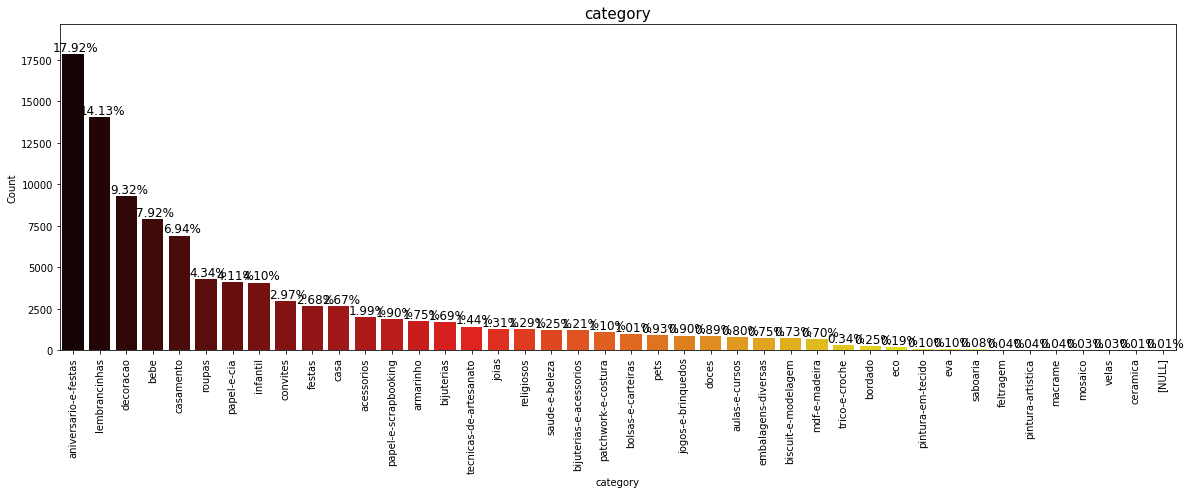

In [16]:
# percentual de cada categoria
plot_percentage('category', df)

## 3.2 Preparação dos dados
[Retorna para Conteúdo](#Conteúdo)

In [17]:
# copy data
df_prep = df.copy()

In [18]:
# formato 'yyyy-mm-dd'
df_prep['order_date'] = pd.to_datetime(df_prep['order_date'], format='%d/%m/%Y')

In [19]:
# strig --> float
df_prep['preco'] = df_prep['preco'].apply(lambda x: float(str(x).replace(',', '.')))

In [20]:
# drop '[NULL]'
df_prep = df_prep.query('category != "[NULL]"')

In [21]:
# substituir valores na coluna 'subcategory'
df_prep.loc[:, 'subcategory'] = df_prep.loc[:,'subcategory'].replace({
    'moldes': 'molde',
    'toppers': 'topper',
    'tubetes': 'tubete', 
    'tags': 'tag'
})


In [22]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99639 entries, 0 to 99643
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   order_id     99639 non-null  object        
 1   product_id   99639 non-null  object        
 2   buyer_id     99639 non-null  object        
 3   order_date   99639 non-null  datetime64[ns]
 4   category     99639 non-null  object        
 5   subcategory  99639 non-null  object        
 6   quantidade   99639 non-null  int64         
 7   preco        99639 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 6.8+ MB


In [23]:
df_prep.head()

,order_id,product_id,buyer_id,order_date,category,subcategory,quantidade,preco
0,8DE8B7,822945,55498,2017-01-01,papel-e-cia,etiquetas-personalizadas,1,36.0
1,8DE8E2,8527FA,59E00,2017-01-01,decoracao,adesivos-de-parede,1,45.9
2,8DE5BF,7805CB,CEBB5,2017-01-01,lembrancinhas,brinde-corporativo,7,3.5
3,8DE7A8,796DE2,E3E11,2017-01-01,bijuterias,colar,1,35.0
4,8DE2F9,7041AF,FFD39,2017-01-01,papel-e-cia,risque-e-rabisque,1,12.0


## 4. RFM
[Retorna para Conteúdo](#Conteúdo)

**Recência** - há quantos dias desde a última compra?

**Frequência** - quantas compras o cliente realizou?

**Monetário** - quanto o cliente já gastou?

In [24]:
# definindo data máxima para análise
latest_date = df_prep['order_date'].max()
latest_date

Timestamp('2019-12-31 00:00:00')

## 4.1 Recência
[Retorna para Conteúdo](#Conteúdo)

In [25]:
# data do último pedido do cliente
df_buy = df_prep.groupby('buyer_id').order_date.max().reset_index()

# renomeia
df_buy.columns = ['buyer_id', 'order_date_max']

# cálculo da recência em dias
df_buy['recency'] = (latest_date - df_buy['order_date_max']).dt.days

df_buy.head()

,buyer_id,order_date_max,recency
0,10012C,2017-07-17,897
1,10044F,2017-06-05,939
2,1007D2,2018-06-03,576
3,1008C4,2018-08-08,510
4,100933,2019-11-14,47


In [26]:
df_buyer = pd.merge(df_prep, df_buy[['buyer_id', 'recency']], on='buyer_id')
df_buyer.head()

,order_id,product_id,buyer_id,order_date,category,subcategory,quantidade,preco,recency
0,8DE8B7,822945,55498,2017-01-01,papel-e-cia,etiquetas-personalizadas,1,36.0,589
1,F20947,A8A627,55498,2018-05-21,bijuterias,outra-sub-categoria,1,10.0,589
2,F20ED6,A59ED9,55498,2018-05-21,aniversario-e-festas,forminhas-para-doces,1,29.9,589
3,8DE8E2,8527FA,59E00,2017-01-01,decoracao,adesivos-de-parede,1,45.9,151
4,15D0CAD,B24F3C,59E00,2019-08-02,jogos-e-brinquedos,bebe-reborn,1,579.0,151


In [136]:
def calculate_wcss(df):
    wcss = []
    for k in range(1, 9):                 # n clusters tested
        kmeans = KMeans(n_clusters=k)  
        kmeans.fit(X=df.copy())           # Make a copy of the DataFrame
        df['clusters'] = kmeans.labels_   # new column defining cluster
        wcss.append(kmeans.inertia_)      # inertia value
    return wcss


In [137]:
df_recency = df_buyer[['recency']].copy()

wcss_values = calculate_wcss(df_recency)

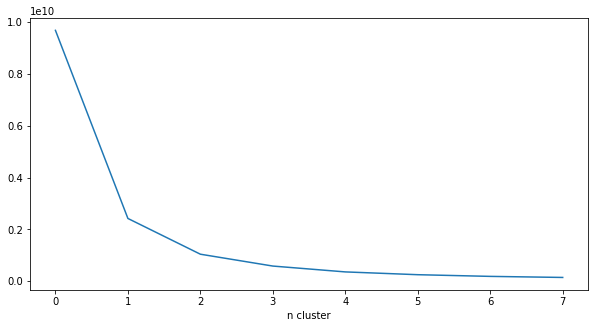

In [138]:
plt.figure(figsize=(10, 5))
plt.plot(wcss_values)
plt.xlabel('n cluster')
plt.show()

In [139]:
# copy dataset
df_clusters = df_buyer[['order_id', 'buyer_id', 'quantidade', 'preco', 'recency']].copy()

In [140]:
# criar coluna recency_cluster
kmeans = KMeans(n_clusters=3, random_state=seed_value)

df_clusters['recency_cluster'] = kmeans.fit_predict(df_recency)
df_clusters.sample(5)

,order_id,buyer_id,quantidade,preco,recency,recency_cluster
63475,10294AD,7D442C,1,80.0,141,1
3750,A416CB,547FD7,15,1.0,981,2
9042,EE8A23,400174,30,2.1,603,0
61755,FE71C9,7BBE14,1,122.0,521,0
34560,C47F14,365AF5,1,155.0,778,2


In [141]:
# função de clusterização

def order_cluster(cluster_name, target_name, df, order):
    # agrupar por média
    grouping_by_cluster = df.groupby(cluster_name)[target_name].mean().reset_index()
    
    # ordenar pelo cluster
    grouping_by_cluster_ordered = grouping_by_cluster.sort_values(by=target_name, ascending=order).reset_index(drop=True)
    
    # criar cluster ordenado
    grouping_by_cluster_ordered['index'] = grouping_by_cluster_ordered.index
    
    # adicionar coluna de cluster ao dataset
    joining_clusters = pd.merge(df, grouping_by_cluster_ordered[[cluster_name, 'index']], on=cluster_name)
    
    # deletar cluster  não ordenado
    remove_column = joining_clusters.drop(cluster_name, axis=1)
    
    # renomear coluna
    data_rfm = remove_column.rename(columns={'index':cluster_name})
    
    return data_rfm

In [142]:
# aplicar função
df_clusters = order_cluster('recency_cluster', 'recency', df_clusters, False)

# média com a maior recência recebe pontuação 0, com a menor recência recebe 3
df_clusters.groupby('recency_cluster')['recency'].describe()

,count,mean,std,min,25%,50%,75%,max
recency_cluster,,,,,,,,
0,27224.0,864.172495,120.566725,669.0,763.0,859.0,965.0,1094.0
1,32368.0,473.494099,102.729335,305.0,390.0,464.0,558.0,668.0
2,40047.0,135.800385,87.555205,0.0,57.0,122.0,212.0,304.0


## 4.2 Frequência
[Retorna para Conteúdo](#Conteúdo)

In [143]:
df_frequency = df_buyer[['buyer_id', 'order_id']].copy()

# count all orders
df_frequency['frequency'] = df_frequency.groupby('buyer_id')['order_id'].transform('count')
df_frequency = df_frequency.drop(['order_id'], axis=1).drop_duplicates()

df_frequency.head()

,buyer_id,frequency
0,55498,3
3,59E00,2
5,CEBB5,2
7,E3E11,4
11,FFD39,1


In [144]:
# merge 
df_clusters = pd.merge(df_clusters, df_frequency, on='buyer_id')

# filtra coluna
df_frequency = df_clusters[['frequency']]

In [145]:
# cria coluna frequency_cluster 
kmeans = KMeans(n_clusters=3, random_state=seed_value)
df_clusters['frequency_cluster'] = kmeans.fit_predict(df_frequency)

In [146]:
# aplicar função
df_clusters = order_cluster('frequency_cluster', 'frequency', df_clusters, True)

# média com a menor frequency recebe pontuação 0, com a maior frequency recebe 3
df_clusters.groupby('frequency_cluster')['frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
frequency_cluster,,,,,,,,
0,95516.0,3.648206,2.386194,1.0,2.0,3.0,5.0,14.0
1,3602.0,25.921155,11.631284,15.0,17.0,22.0,30.0,68.0
2,521.0,134.927063,22.806090,92.0,125.0,152.0,152.0,152.0


## 4.3 Monetário
[Retorna para Conteúdo](#Conteúdo)

In [147]:
df_monetary = df_buyer[['buyer_id', 'quantidade', 'preco']].copy()

# calculate total
df_monetary['total_value'] = df_monetary['quantidade'] * df_monetary['preco']

# sum all orders
df_monetary['monetary'] = df_monetary.groupby('buyer_id')['total_value'].transform('sum')
df_monetary = df_monetary.drop(['quantidade', 'preco', 'total_value'], axis=1).drop_duplicates()

df_monetary.head()

,buyer_id,monetary
0,55498,75.9
3,59E00,624.9
5,CEBB5,83.4
7,E3E11,158.0
11,FFD39,12.0


In [148]:
# merge 
df_clusters = pd.merge(df_clusters, df_monetary, on='buyer_id')

# filtra coluna
df_monetary = df_clusters[['monetary']]

In [149]:
# cria coluna monetary_cluster 
kmeans = KMeans(n_clusters=3, random_state=seed_value)
df_clusters['monetary_cluster'] = kmeans.fit_predict(df_monetary)

In [150]:
# aplicar função
df_clusters = order_cluster('monetary_cluster', 'monetary', df_clusters, True)

# média com a menor monetary recebe pontuação 0, com a maior monetary recebe 3
df_clusters.groupby('monetary_cluster')['monetary'].describe()

,count,mean,std,min,25%,50%,75%,max
monetary_cluster,,,,,,,,
0,79189.0,165.946955,111.293267,0.01,72.4,144.78,244.30,426.8
1,19010.0,689.275862,239.817683,426.85,504.9,615.75,800.00,1476.0
2,1440.0,2279.008299,1208.573022,1484.80,1630.9,1880.75,2288.99,11690.0


## 4.4 Pontuação
[Retorna para Conteúdo](#Conteúdo)

In [151]:
# filtra cols
df_clusters_final = df_clusters[['buyer_id','recency','recency_cluster','frequency','frequency_cluster','monetary','monetary_cluster']].drop_duplicates()

# calcular score
df_clusters_final['score'] = df_clusters_final['recency_cluster'] + df_clusters['frequency_cluster'] + df_clusters['monetary_cluster']

# filtra cols
df_clusters_final = df_clusters_final[['buyer_id', 'score']]

df_clusters_final.sample(5)

,buyer_id,score
47256,9CE728,2.0
48210,1AD28E,2.0
22919,899303,1.0
9987,3D875,1.0
27199,567492,2.0


In [168]:
# total de buyers por score
df_clusters_final.groupby('score').count()

,buyer_id
score,
0.0,9909
1.0,11992
2.0,15344
3.0,1890
4.0,147
5.0,4


## 5. Análise
[Retorna para Conteúdo](#Conteúdo)

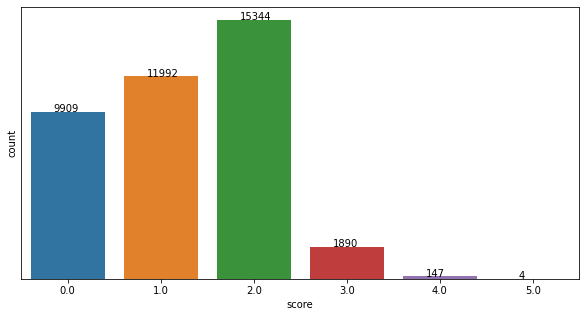

In [184]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df_clusters_final, x="score")

for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
    
# remover ticks e valores do eixo y
ax.set_yticks([])
ax.set_yticklabels([])

plt.show()